In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch.nn.init
from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Prepare Data

In [3]:
mnist_train = dsets.MNIST(root = './data/', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = dsets.MNIST(root = './data/', train = False, transform = transforms.ToTensor(), download = True)

Processing...
Done!


In [5]:
######checking######

print(mnist_train.train_data.size())
print(mnist_test.test_data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


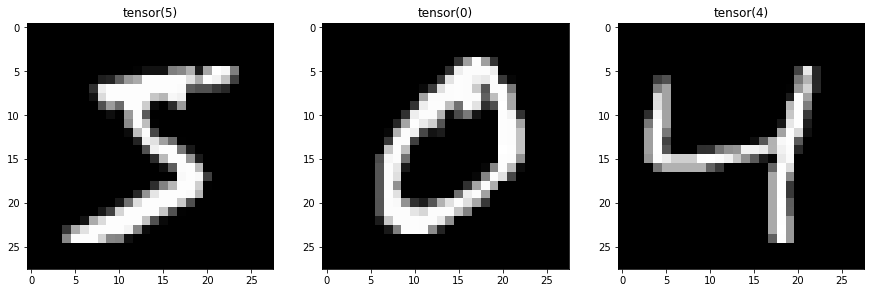

In [6]:
######checking######

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(str(mnist_train.train_labels[0]))
ax1.imshow(mnist_train.train_data[0,:,:].numpy(), cmap='gray')

ax2.set_title(str(mnist_train.train_labels[1]))
ax2.imshow(mnist_train.train_data[1,:,:].numpy(), cmap='gray')

ax3.set_title(str(mnist_train.train_labels[2]))
ax3.imshow(mnist_train.train_data[2,:,:].numpy(), cmap='gray')

### 2. Batch Training

In [7]:
batch_size = 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

# dataset (Dataset) – dataset from which to load the data.
# batch_size (int, optional) – how many samples per batch to load (default: 1).
# shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
# num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

In [8]:
######checking######

for i in range(3) :
    batch_images, batch_labels = next(iter(data_loader))
    print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[9 4 0 9 4 5 8 9 4 3 6 9 8 0 4 2 5 0 8 1 4 0 1 2 7 8 6 9 4 7 4 4 3 9 7 6 3
 8 4 3 4 8 4 0 8 5 6 7 5 8 5 2 9 5 5 6 8 6 2 3 9 7 1 1 7 1 6 5 6 0 2 3 2 6
 9 7 3 3 4 7 9 3 2 2 1 5 6 0 0 2 3 1 9 7 4 0 4 3 3 7] ,  100
[1 6 5 4 5 7 7 9 3 5 0 8 5 4 3 3 6 5 9 2 9 9 3 7 9 5 3 6 5 0 8 0 9 8 2 9 2
 2 2 7 3 0 0 5 3 7 3 7 7 3 1 1 1 3 3 2 2 8 5 9 9 6 8 4 3 2 8 8 5 8 1 8 2 4
 3 7 8 2 7 6 0 8 6 3 3 6 1 6 3 2 7 2 2 7 6 2 3 2 9 6] ,  100
[0 7 4 1 4 6 5 4 2 9 8 4 3 8 1 9 9 6 5 8 3 9 6 6 1 8 8 7 7 7 0 3 1 4 1 4 6
 7 1 9 0 6 1 8 8 9 9 5 3 7 6 7 8 6 1 8 6 1 7 1 7 7 3 8 2 4 5 9 0 8 5 0 1 3
 6 7 9 4 8 5 8 4 5 2 0 7 0 6 4 9 8 8 2 2 2 3 0 5 1 0] ,  100


### 3. Define Model

In [9]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.L1 = nn.Linear(28 * 28, 512, bias = True)
        self.L2 = nn.Linear(512, 10, bias = True)
        
    def forward(self, x):
        x = F.relu(self.L1(x))
        x = self.L2(x)
        return x
        
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (L1): Linear(in_features=784, out_features=512, bias=True)
  (L2): Linear(in_features=512, out_features=10, bias=True)
)


### 4. Define Loss function and Optimizer
* Loss function : Cross-Entropy loss
* Optimizer = SGD
* learning rate = 0.001
* total epochs = 5

In [11]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

In [13]:
num_epochs = 5

In [17]:
for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        inputs = Variable(batch_images.view(-1, 28 * 28))
        labels = Variable(batch_labels)
        
        outputs = net(inputs)
        cost = loss(outputs, labels)
        
        optimizer.zero_grad()
        
        cost.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [100/600] Loss: 2.2303
Epoch [1/5], lter [200/600] Loss: 2.2087
Epoch [1/5], lter [300/600] Loss: 2.1816
Epoch [1/5], lter [400/600] Loss: 2.1584
Epoch [1/5], lter [500/600] Loss: 2.1328
Epoch [1/5], lter [600/600] Loss: 2.1377
Epoch [2/5], lter [100/600] Loss: 2.0674
Epoch [2/5], lter [200/600] Loss: 2.0507
Epoch [2/5], lter [300/600] Loss: 2.0357
Epoch [2/5], lter [400/600] Loss: 1.9803
Epoch [2/5], lter [500/600] Loss: 1.9720
Epoch [2/5], lter [600/600] Loss: 1.9073
Epoch [3/5], lter [100/600] Loss: 1.8753
Epoch [3/5], lter [200/600] Loss: 1.8339
Epoch [3/5], lter [300/600] Loss: 1.8602
Epoch [3/5], lter [400/600] Loss: 1.7857
Epoch [3/5], lter [500/600] Loss: 1.7434
Epoch [3/5], lter [600/600] Loss: 1.7408
Epoch [4/5], lter [100/600] Loss: 1.7184
Epoch [4/5], lter [200/600] Loss: 1.6715
Epoch [4/5], lter [300/600] Loss: 1.6212
Epoch [4/5], lter [400/600] Loss: 1.6155
Epoch [4/5], lter [500/600] Loss: 1.5368
Epoch [4/5], lter [600/600] Loss: 1.4903
Epoch [5/5], lte

### 5. Test!!!

In [19]:
net.eval()

correct = 0
total = 0

for images, labels in mnist_test:
    
    images  = Variable(images.view(-1, 28 * 28))
    outputs = net(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * correct / total))

Accuracy of test images: 79.000000 %
